<a href="https://colab.research.google.com/github/mohssen-mhd98/Arduino-Emulation-Proteus/blob/main/Cifar10Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from tensorflow import keras
from tensorflow.keras import datasets, layers, losses
import numpy as np
import matplotlib.pyplot as plt

In [38]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [39]:
print(type(train_images))
print(train_images.shape, train_labels.shape)

<class 'numpy.ndarray'>
(50000, 32, 32, 3) (50000, 1)


In [40]:
class_name = ["airplane", "automobile", "bird", "car", "deer", "dog", "frog", "horse", "ship", "truck"]

Text(0.5, 1.0, 'frog')

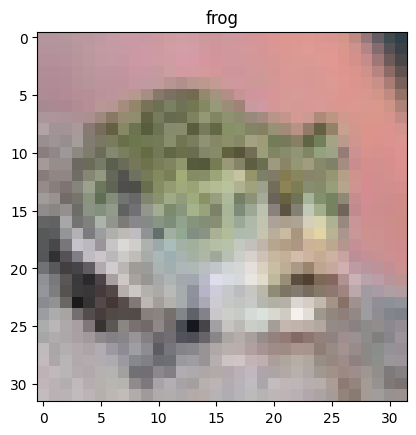

In [41]:
index = 210
plt.imshow(train_images[index])
plt.title(class_name[train_labels[index][0]])

In [42]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, kernel_initializer='he_uniform', activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(10, kernel_initializer='he_uniform', activation='softmax')
])

In [43]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_43 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_44 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_45 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [44]:
model.compile(optimizer='adam',loss=losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [45]:
history = model.fit(train_images, train_labels, batch_size=50, epochs=25, validation_data=(test_images, test_labels))

Epoch 1/25
1000/1000 [==============================] - 399s 397ms/step - loss: 1.7111 - accuracy: 0.3685 - val_loss: 1.2910 - val_accuracy: 0.5261
Epoch 2/25
1000/1000 [==============================] - 396s 396ms/step - loss: 1.2476 - accuracy: 0.5505 - val_loss: 1.0421 - val_accuracy: 0.6260
Epoch 3/25
1000/1000 [==============================] - 394s 395ms/step - loss: 1.0331 - accuracy: 0.6365 - val_loss: 0.8836 - val_accuracy: 0.6847
Epoch 4/25
1000/1000 [==============================] - 393s 393ms/step - loss: 0.9109 - accuracy: 0.6808 - val_loss: 0.8424 - val_accuracy: 0.7093
Epoch 5/25
1000/1000 [==============================] - 393s 393ms/step - loss: 0.8246 - accuracy: 0.7109 - val_loss: 0.7673 - val_accuracy: 0.7267
Epoch 6/25
1000/1000 [==============================] - 391s 391ms/step - loss: 0.7587 - accuracy: 0.7343 - val_loss: 0.6890 - val_accuracy: 0.7596
Epoch 7/25
1000/1000 [==============================] - 393s 392ms/step - loss: 0.7151 - accuracy: 0.7507 - val_

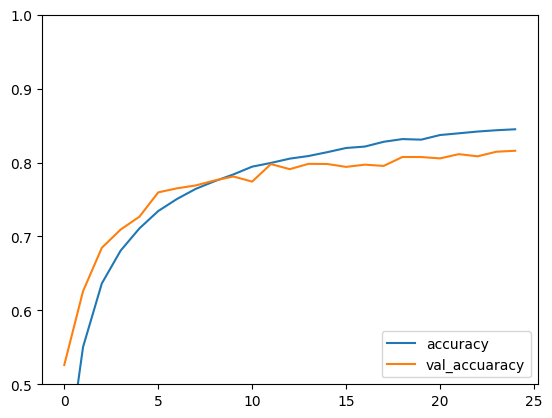

In [48]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuaracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')